# Checkpoint Three: Cleaning Data For Items Dataset Only

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).


In [269]:
import pandas as pd
import numpy as np
items = pd.read_csv("roll_20_items.csv")

<h1 style="background-color:DodgerBlue;text-align:center">Missing Data</h1>

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

### Items Table

Currently missing data in 14 columns, 3 of which are numeric.  Will explore the data more and see if values, such as 0 or "none" can be added to it.

In [329]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item              771 non-null    object 
 1   type              771 non-null    object 
 2   notes             338 non-null    object 
 3   item_rarity       382 non-null    object 
 4   weight            610 non-null    float64
 5   attunement        771 non-null    int64  
 6   details           702 non-null    object 
 7   modifiers         186 non-null    object 
 8   ac                194 non-null    float64
 9   save              5 non-null      object 
 10  stealth           112 non-null    object 
 11  damage            204 non-null    object 
 12  damage_type       201 non-null    object 
 13  duration          10 non-null     object 
 14  secondary damage  31 non-null     object 
 15  range             88 non-null     object 
 16  properties        179 non-null    object 
 1

In [271]:
items.isna().sum()

item                  0
type                  0
notes               433
item_rarity         389
weight              161
attunement            0
details              69
modifiers           585
ac                  577
save                766
stealth             659
damage              567
damage_type         570
duration            760
secondary damage    740
range               683
properties          592
dtype: int64

In [272]:
items.head(5)

,item,type,notes,item_rarity,weight,attunement,details,modifiers,ac,save,stealth,damage,damage_type,duration,secondary damage,range,properties
0,abacus,adventuring gear,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acid,adventuring gear,consumable,NaN,1.0,0,"As an action, you can splash the contents of t...",NaN,NaN,NaN,NaN,2d6,acid,NaN,NaN,20/60,improvised weapons
2,adamantine armor,armor,"medium or heavy, but not hide",NaN,NaN,0,This suit of armor is reinforced with adamanti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alchemist's fire,adventuring gear,consumable,NaN,1.0,0,"This sticky, adhesive fluid ignites when expos...",NaN,NaN,dexterity,NaN,1d4,fire,NaN,NaN,20/60,improvised weapons
4,alchemist's supplies,adventuring gear,artisan's tools,standard,8.0,0,These Special tools include the items needed t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
items.columns

Index(['item', 'type', 'notes', 'item_rarity', 'weight', 'attunement',
       'details', 'modifiers', 'ac', 'save', 'stealth', 'damage',
       'damage_type', 'duration', 'secondary damage', 'range', 'properties',
       'notes_clean', 'rarity_clean', 'weight_clean', 'details_clean',
       'mods_clean', 'ac_clean', 'save_clean', 'stealth_clean', 'damage_clean',
       'dt_clean', 'dur_clean', 'sd_clean', 'range_clean', 'prop_clean'],
      dtype='object')

**Notes** provides GMs with additional details about items such as usability (consumable) or details (medium or heavy, but not hide).  Having "none" as an option will be appropriate.

In [273]:
items.groupby("notes").nunique()
items["notes"].isna().sum()  #433
items["notes_clean"] = items["notes"].fillna("none")
items["notes_clean"].head()
items["notes_clean"].isna().sum() 

0

**Rarity** provides info on the likelihood of finding one of these items.  The NaN value could be replaced with "common" as many of the blanks are on items that would be easy for players to buy, find, trade for/etc.  I initially thought rarity was only part of a _wonderous item_ but there are items like the "Immovable Rod" that are noted as "(rod)" not "(wonderous item)" that have rarity values, too.  

In [274]:
items.groupby("item_rarity").count() #9 groups
items["item_rarity"].isna().sum()  #389
items["rarity_clean"] = items["item_rarity"].fillna("common")
items["rarity_clean"].head()
items["rarity_clean"].isna().sum()  #0

0

<AxesSubplot:ylabel='weight'>

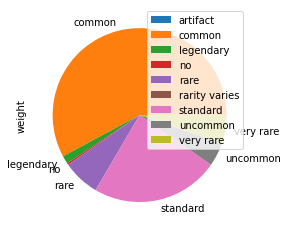

In [275]:
# dt = items.groupby("item_rarity").count()
# dt.plot.pie(y="weight_clean")

dt = items.groupby("rarity_clean").count()
dt.plot.pie(y="weight")

**Weight** is used as a limiting factor in the game that tries to bring a sense of reality to the game.  You don't have infinite hammer space to carry everything you see.  When cleaning this, I felt that if an item wasn't given a weight then it would be 0 pounds.  But this is a fuzzy space, an "Amulet of Proof Against Detection and Location" has no information about weight, but if your player insists on wearing 40 of these, you could provide a weight to them.

In [276]:
items.groupby("weight").count()  #32
items["weight"].isna().sum()  #161
items["weight_clean"] = items["weight"].fillna(0)
items["weight_clean"].head()
items["weight_clean"].isna().sum()  #0

0

<AxesSubplot:ylabel='item'>

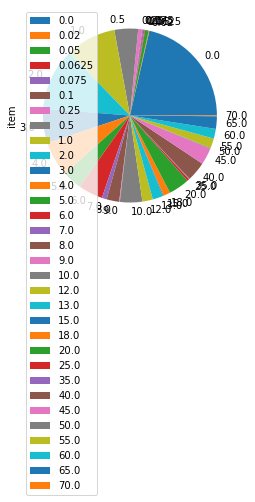

In [277]:
# dt = items.groupby("weight_clean").count()
# dt.plot.pie(y="item")

dt = items.groupby("weight_clean").count()
dt.plot.pie(y="item")

**Details** explain how an items can be used in more "detail".  If attunement is needed, the time and materials required.  If using it as a weapon, any rules about distance, area of effect (AOE), or what a "hit" does. So if no extra notes are provided, "none" feels like a good fit.

In [278]:
items.groupby("details").nunique()
items["details"].isna().sum()  #389
items["details_clean"] = items["details"].fillna("none")
items["details_clean"].head()
items["details_clean"].isna().sum()  #0

0

**Modifiers** add buffs to players and creatures, so if a value is empty then nothing is happening.

In [279]:
items.groupby("modifiers").count()
items["modifiers"].isna().sum() #585
items["mods_clean"] = items["modifiers"].fillna("none")
items["mods_clean"].head(10)
items["mods_clean"].isna().sum() 

0

<AxesSubplot:ylabel='mods_clean'>

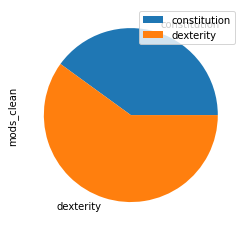

In [280]:
# dt = items.groupby("mods_clean").count()
# dt.plot.pie(y="weight_clean")

dt = items.groupby("save").count()
dt.plot.pie(y="mods_clean")

**Armor Class** adds protection based on type of materials and weight, so if a value is null then 0 protection is added.

In [281]:
items.groupby("ac").count()
items["ac"].isna().sum() #577
items["ac_clean"] = items["ac"].fillna(0)
items["ac_clean"].head()
items["ac_clean"].isna().sum()  #0

0

<AxesSubplot:ylabel='weight_clean'>

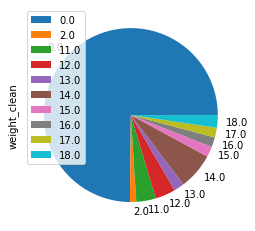

In [282]:
# dt = items.groupby("ac").count()
# dt.plot.pie(y="weight_clean")

dt = items.groupby("ac_clean").count()
dt.plot.pie(y="weight_clean")

**Saves or Saving Throws** provide information on how a creature/player can avoid a threat.  In this case, which stat would be used based on proficincy or skill level.  Many times this is added to provide context on how the creature/player should avoid the threat.  Many items are just items and do not have this, so "none" feels apporpiate.

In [283]:
items.groupby("save").count()
items["save"].isna().sum() #766
items["save_clean"] = items["save"].fillna("none")
items["save_clean"].head()
items["save_clean"].isna().sum()  #0

0

<AxesSubplot:ylabel='save_clean'>

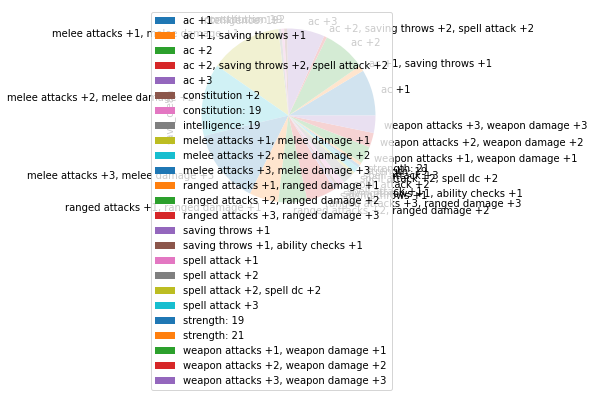

In [284]:
dt = items.groupby("modifiers").count()
dt.plot.pie(y="save_clean")

**Stealth** is reduced, or to your disadvantage, with certain items such as platemail or other heavy armors.  So if your stealth is not affected, then nothing changes.

In [285]:
items.groupby("stealth").count()
items["stealth"].isna().sum() #659
items["stealth_clean"] = items["stealth"].fillna("none")
items["stealth_clean"].head()
items["stealth_clean"].isna().sum()

0

<AxesSubplot:ylabel='modifiers'>

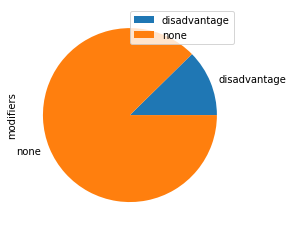

In [286]:
# dt = items.groupby("stealth_clean").count()
# dt.plot.pie(y="save_clean")

dt = items.groupby("stealth_clean").count()
dt.plot.pie(y="modifiers")

**Damage** is the amount, or potential amount, of damange an item can inflict.  The majority are based on dice rolls.  Items, such as a health potion or an amulate, are not going to cause damage, so their damage score would be 0.

In [287]:
items.groupby("damage").count()
items["damage"].isna().sum() #567
items["damage_clean"] = items["damage"].fillna("none")
items["damage_clean"].head()
items["damage_clean"].isna().sum()

0

<AxesSubplot:ylabel='damage'>

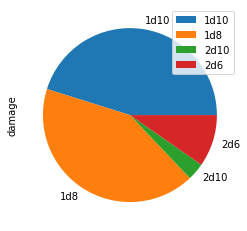

In [288]:
# dt = items.groupby("damage").count()
# dt.plot.pie(y="secondary damage")

# dt = items.groupby("damage_clean").count()
# dt.plot.pie(y="sd_clean")

dt = items.groupby("secondary damage").count()
dt.plot.pie(y="damage")

**Damage Type** is a notation of how damage is delivered.  This is useful as some creature/armors/magics are resiliant or more vulnerable to certain damage types.  This is a feature more for items that work with damage (delivery or protection) only, so items that don't fall into that category will have no damage type, or none.

In [289]:
items.groupby("damage_type").count()
items["damage_type"].isna().sum() #570
items["dt_clean"] = items["damage_type"].fillna("none")
items["dt_clean"].head()
items["dt_clean"].isna().sum()

0

<AxesSubplot:ylabel='damage_clean'>

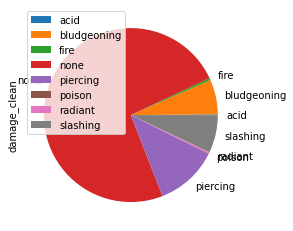

In [290]:
# dt = items.groupby("damage_type").count()
# dt.plot.pie(y="damage")

dt = items.groupby("dt_clean").count()
dt.plot.pie(y="damage_clean")

**Duration** provides information about how long a magical effect will last.  If not a feature of an item, then no duration.

In [291]:
items.groupby("duration").count()
items["duration"].isna().sum() #760
items["dur_clean"] = items["duration"].fillna("none")
items["dur_clean"].head()
items["dur_clean"].isna().sum()

0

<AxesSubplot:ylabel='damage_clean'>

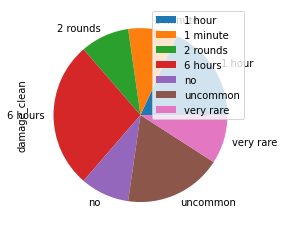

In [292]:
dt = items.groupby("duration").count()
dt.plot.pie(y="damage_clean")

# dt = items.groupby("dur_clean").count()
# dt.plot.pie(y="damage_clean")

**Secondary Damage** is an attribute with two handed weapons and not common for many items.  Presented as number of dice.  So "None" seems appropriate.

In [293]:
items.groupby("secondary damage").count()
items["secondary damage"].isna().sum() #740
items["sd_clean"] = items["secondary damage"].fillna("none")
items["sd_clean"].head()
items["sd_clean"].isna().sum()

0

<AxesSubplot:ylabel='damage_clean'>

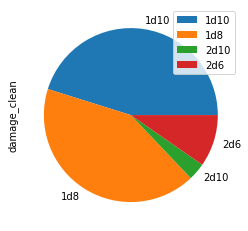

In [294]:
dt = items.groupby("secondary damage").count()
dt.plot.pie(y="damage_clean")

**Range** provides normal and long distance.  This indicates where a creature/player would likely have success with their ranged weapon.  Anything outside the range will give the creature/player disadvantage.

In [295]:
items.groupby("range").count()
items["range"].isna().sum() #683
items["range_clean"] = items["range"].fillna("none")
items["range_clean"].head()
items["range_clean"].isna().sum()

0

<AxesSubplot:ylabel='damage'>

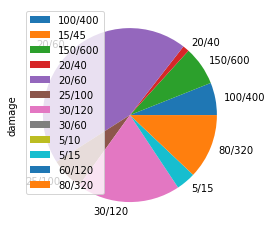

In [296]:
dt = items.groupby("range").count()
dt.plot.pie(y="damage")

# dt = items.groupby("range_clean").count()
# dt.plot.pie(y="damage_clean")

**Properties** provide more features to weapons related to player usage.  Is it a melee weapon? (battleaxe) Does it require loading? (crossbow) One or Two hands? (Greatsword)  Light or Heavy?  Reach? (Halberd), Thrown? (Javelin), etc.
If an item is not a weapon (or able to weild damage) it won't have any properites.

In [297]:
items.groupby("properties").count()
items["properties"].isna().sum() #592
items["prop_clean"] = items["properties"].fillna("none")
items["prop_clean"].head()
items["prop_clean"].isna().sum()

0

In [298]:
items.columns

Index(['item', 'type', 'notes', 'item_rarity', 'weight', 'attunement',
       'details', 'modifiers', 'ac', 'save', 'stealth', 'damage',
       'damage_type', 'duration', 'secondary damage', 'range', 'properties',
       'notes_clean', 'rarity_clean', 'weight_clean', 'details_clean',
       'mods_clean', 'ac_clean', 'save_clean', 'stealth_clean', 'damage_clean',
       'dt_clean', 'dur_clean', 'sd_clean', 'range_clean', 'prop_clean'],
      dtype='object')

<AxesSubplot:ylabel='weight_clean'>

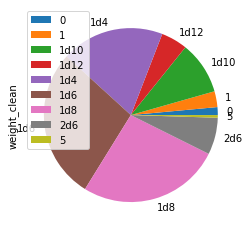

In [299]:
# dt = items.groupby("damage_clean").count()
# dt.plot.pie(y="weight_clean")

dt = items.groupby("damage").count()
dt.plot.pie(y="weight_clean")

<AxesSubplot:ylabel='weight_clean'>

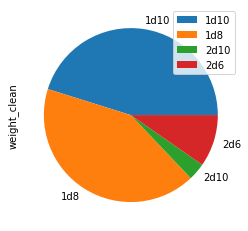

In [300]:
# dt = items.groupby("sd_clean").count()
# dt.plot.pie(y="weight_clean")

dt = items.groupby("secondary damage").count()
dt.plot.pie(y="weight_clean")

In [301]:
#Cleaning Check
items.head()

,item,type,notes,item_rarity,weight,attunement,details,modifiers,ac,save,...,mods_clean,ac_clean,save_clean,stealth_clean,damage_clean,dt_clean,dur_clean,sd_clean,range_clean,prop_clean
0,abacus,adventuring gear,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,...,none,0.0,none,none,none,none,none,none,none,none
1,acid,adventuring gear,consumable,NaN,1.0,0,"As an action, you can splash the contents of t...",NaN,NaN,NaN,...,none,0.0,none,none,2d6,acid,none,none,20/60,improvised weapons
2,adamantine armor,armor,"medium or heavy, but not hide",NaN,NaN,0,This suit of armor is reinforced with adamanti...,NaN,NaN,NaN,...,none,0.0,none,none,none,none,none,none,none,none
3,alchemist's fire,adventuring gear,consumable,NaN,1.0,0,"This sticky, adhesive fluid ignites when expos...",NaN,NaN,dexterity,...,none,0.0,dexterity,none,1d4,fire,none,none,20/60,improvised weapons
4,alchemist's supplies,adventuring gear,artisan's tools,standard,8.0,0,These Special tools include the items needed t...,NaN,NaN,NaN,...,none,0.0,none,none,none,none,none,none,none,none


<h1 style="background-color:DodgerBlue;text-align:center">Irregular Data</h1>

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

- [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)


<AxesSubplot:>

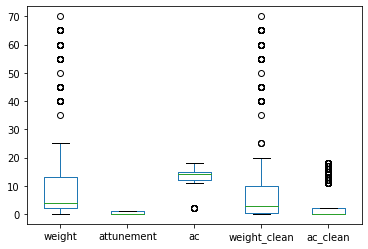

In [302]:
items.plot.box() 

<AxesSubplot:xlabel='ac_clean', ylabel='weight_clean'>

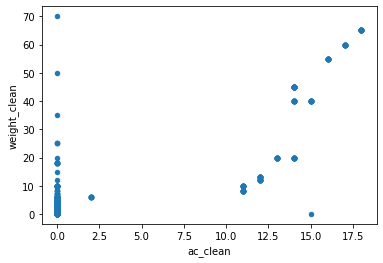

In [303]:
items.plot.scatter(x="ac_clean",  y="weight_clean")

In [315]:
ac_check = items.loc[items["weight_clean"] == 50 ]
# print(ac_check)
# outlier 
# 1. ac_clean = 15 & weight_clean = 0: Robe of the archmage whihc has no weight associated with it
# 2. ac_clean = 0 and weight = 70: A barrel
# 3. ac_clean = 0 and weight = 50: Mirror of Life Trapping
# Seems that the 0 ac and items with weight are more like items that could take damage instead of a player, and could be found in the environment

<AxesSubplot:xlabel='ac', ylabel='weight'>

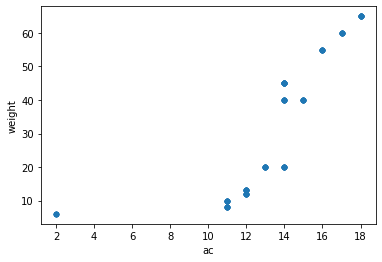

In [304]:
items.plot.scatter(x="ac",  y="weight")

In [331]:
ac_check = items.loc[items["weight"] == 0]
# print(ac_check)
# this seems to be all four slings
ac_check = items.loc[items["ac"] < 15]
# print(ac_check)
# These seem to make sense 


<h1 style="background-color:DodgerBlue;text-align:center">Unnecessary Data</h1>

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

I might have created a lot of uncessary data when I replaced the nulls with 0s, but we'll worry about that in the next checkpoint. 

<h1 style="background-color:DodgerBlue;text-align:center">Inconsistent Data</h1>

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

There are a few strange entries in the **duration** column.  This column reflect times that magical items last, but the following are also in the column: "No", "Uncommon", & "Very Rare".  So I did some D&D research to verify if they were entered correctly.

**Findings:**

All of these items are magical in nature, and one of the rules all magical items have in the game is they last for a set time (aka "duration").  For some, it is stated in the rules but also so infrequent that it might be harder to explain in a short summary like this table than having a player look up the details.  Others are items that are to be used right away, so thier duration is based on use.

- **No** - Elven Chain.  This makes sense, but I think I would change it to a NaN value or 0 instead of a "No"
- **very rare** - efreeti bottle - has durations based on dice roll, and the item itself will no longer be magical after usage
- **uncommon** - elemental gem & eversmoking bottle durations vary by usage

I decided to update the Elven Chain and leave the other 3 as is.
[Selecting rows in pandas DataFrame based on conditions](https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/)

In [305]:
no_check = items.loc[items["duration"] == "no"]
# print(no_check) - elven chain
items['duration'] = items['duration'].replace(['no'],np.nan)
items["duration"].isna().sum() # 761 compared to 760 previously

# vr_check = items.loc[items["duration"] == "very rare"]
# print(vr_check) - efreeti bottle

# uncom_check = items.loc[items["duration"] == "uncommon"]
# print(uncom_check) - elemental gem & eversmoking bottle

items.groupby("duration").count()
items["duration"].isna().sum() #761
items["dur_clean"] = items["duration"].fillna("none")
items["dur_clean"].head()
items["dur_clean"].isna().sum()

0

<AxesSubplot:ylabel='damage_clean'>

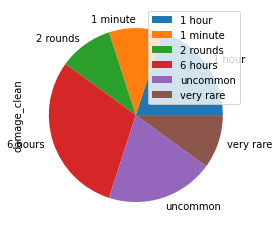

In [306]:
dt = items.groupby("duration").count()
dt.plot.pie(y="damage_clean")

<AxesSubplot:ylabel='duration'>

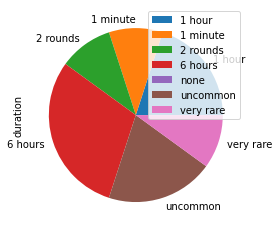

In [307]:
dt = items.groupby("dur_clean").count()
dt.plot.pie(y="duration")

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

1. Yes, but I think my interpretation of the missing data led me to create unnecessary data.
1. Yes, I have a better understanding of what each column means individually and as an item as whole
1. Did I even need to remove the nulls?  We'll see

<h1 style="background-color:Tomato;text-align:center">Exporting Your Cleaned Data</h1>

**Basic Syntax:** cleaned-dataframe.to_csv("path-where-you-want-to-save-your-exported-file/name.csv")

[Importing and exporting CSV files in Python](https://medium.com/@kasiarachuta/importing-and-exporting-csv-files-in-python-7fa6e4d9f408)

In [332]:
items.to_csv("clean_items.csv")

I have run the code above, and a newly cleaned file has been added to my list of files.  I will use **clean_items.csv** in my checkpoint 4.